In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

# Exploring data

In [2]:
df = pd.read_csv('customer_churn.csv',sep=",", index_col=['customerID'])
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
columns = []
for i in range (len(df.columns)):
    columns.append(df.columns[i].lower().replace(" ", "_"))
df.columns = columns
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Take numericals

In [4]:
data = df[['churn', 'tenure','seniorcitizen', 'monthlycharges']]

In [5]:
data.head()

,churn,tenure,seniorcitizen,monthlycharges
customerID,,,,
7590-VHVEG,No,1,0,29.85
5575-GNVDE,No,34,0,56.95
3668-QPYBK,Yes,2,0,53.85
7795-CFOCW,No,45,0,42.30
9237-HQITU,Yes,2,0,70.70


In [6]:
numeric = df.select_dtypes(include=np.number)
numeric.head()

,seniorcitizen,tenure,monthlycharges
customerID,,,
7590-VHVEG,0,1,29.85
5575-GNVDE,0,34,56.95
3668-QPYBK,0,2,53.85
7795-CFOCW,0,45,42.30
9237-HQITU,0,2,70.70


# Take the target separately

In [7]:
churn = data.select_dtypes(include=np.object)
churn.head()

,churn
customerID,
7590-VHVEG,No
5575-GNVDE,No
3668-QPYBK,Yes
7795-CFOCW,No
9237-HQITU,Yes


In [8]:
churn['churn'] = churn['churn'].map({'Yes': 1, 'No': 0})

# Train and predict

In [9]:
transformer = StandardScaler().fit(numeric[['tenure','seniorcitizen','monthlycharges']])
scaled_x = transformer.transform(numeric[['tenure','seniorcitizen','monthlycharges']])

y = pd.DataFrame(data=churn, columns=['churn'])

In [19]:
y.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [21]:
5174/(5174+1869)

0.7346301292063041

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7808802650260294

<AxesSubplot:>

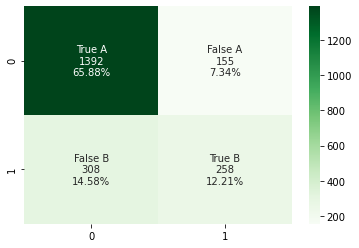

In [11]:
cm = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A', 'False B', 'True B']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

We have 78% accuracy which is pretty high, but as you can see we have imbalanced data for our target. It heavily favours 'True A' as it represents 73.5% of the available target data. As you can see our model is good at predicting a True A (65.86% vs. 7.34%) but bad at predicting a True B (14.58% vs 12.21%).

# Synthetic Minority Oversampling Technique (SMOTE) 

In [12]:
smote = SMOTE()
X = numeric[['tenure', 'seniorcitizen','monthlycharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churn['churn']
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: churn, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7500805152979066

<AxesSubplot:>

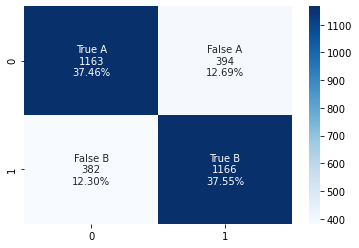

In [14]:
cm = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A', 'False B', 'True B']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

While the model's accuracy decreased, it's ability to predict True A's and True B's are nearly identical. Thus, this model is defintely an improvement even with a slightly lower accuracy.

# Tomek links

In [15]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

0    4697
1    1869
Name: churn, dtype: int64

In [16]:
X_tl2, y_tl2 = tl.fit_resample(X_tl, y_tl)
y_tl2.value_counts()

0    4544
1    1869
Name: churn, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.8040609137055837

<AxesSubplot:>

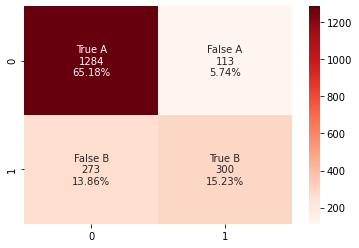

In [18]:
cm = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A', 'False B', 'True B']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Reds')

The accuracy of the model went up but the problem with the first model and predicting 'True B' has remained the same. If you consider the context of what we are trying to do here, we want to better predict True B's because those are the clients we are losing. Therefore, if I was to put one model into practice, it would be the second model with SMOTE as it is better and predicting instances for True B.